# Pick a few targets and plot them

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)
# path to the data
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'MQA'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()
# load all score
df = pd.read_csv(score_dir / 'all_score.csv.gz', index_col=0)
result_each_target = pd.read_csv(score_dir / 'mqa_result_each_target_gdtts_5.csv', index_col=0)
result_each_target_ptm = pd.read_csv(score_dir / 'mqa_result_each_target_gdtts_5_with_ptm.csv', index_col=0)
display(df)

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.981   0.965   0.857        0.899   
1       model_1_ptm_seed_0_rec_10_ens_8    0.981   0.966   0.859        0.900   
2        model_1_ptm_seed_0_rec_1_ens_1    0.980   0.965   0.852        0.901   
3        model_1_ptm_seed_0_rec_1_ens_8    0.980   0.964   0.856        0.899   
4        model_1_ptm_seed_0_rec_2_ens_1    0.980   0.961   0.852        0.900   
...                                 ...      ...     ...     ...          ...   
107795       model_5_seed_1_rec_7_ens_8    0.996   0.994   0.948        0.933   
107796       model_5_seed_1_rec_8_ens_1    0.996   0.993   0.949        0.935   
107797       model_5_seed_1_rec_8_ens_8    0.996   0.994   0.948        0.933   
107798       model_5_seed_1_rec_9_ens_1    0.996   0.993   0.948        0.937   
107799       model_5_seed_1_rec_9_ens_8    0.996   0.994   0.948        0.933   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...       SOAP  \
0           0.894  0.936     0.892      0.084  model_1_ptm  ... 116971.344   
1           0.895  0.937     0.893      0.054  model_1_ptm  ... 117449.914   
2           0.896  0.928     0.887     26.445  model_1_ptm  ... 118798.586   
3           0.895  0.928     0.887     26.413  model_1_ptm  ... 117463.500   
4           0.895  0.933     0.890      0.391  model_1_ptm  ... 118283.023   
...           ...    ...       ...        ...          ...  ...        ...   
107795      0.930  0.874       NaN      1.251      model_5  ... 343708.969   
107796      0.931  0.880       NaN      0.277      model_5  ... 341629.625   
107797      0.929  0.872       NaN      0.574      model_5  ... 342088.125   
107798      0.933  0.887       NaN      0.334      model_5  ... 344117.938   
107799      0.929  0.873       NaN      0.471      model_5  ... 342127.625   

        DeepAccNet  DeepAccNet-Bert P3CMQA  ProQ2D  ProQRosCenD  ProQRosFAD  \
0            0.977            0.981  0.941   0.660        0.690       0.922   
1            0.978            0.981  0.941   0.664        0.691       0.924   
2            0.975            0.971  0.939   0.621        0.658       0.906   
3            0.973            0.971  0.939   0.625        0.677       0.910   
4            0.976            0.971  0.941   0.667        0.697       0.922   
...            ...              ...    ...     ...          ...         ...   
107795       0.848            0.837  0.880   0.664        0.803       0.914   
107796       0.845            0.854  0.881   0.678        0.808       0.914   
107797       0.844            0.821  0.881   0.648        0.804       0.913   
107798       0.856            0.869  0.879   0.682        0.806       0.915   
107799       0.842            0.823  0.878   0.679        0.808       0.916   

       ProQ3D  SBROD VoroCNN  
0       0.795  1.561   0.679  
1       0.798  1.563   0.679  
2       0.763  1.560   0.680  
3       0.770  1.561   0.679  
4       0.804  1.562   0.677  
...       ...    ...     ...  
107795  0.870  1.879   0.702  
107796  0.872  1.888   0.705  
107797  0.868  1.874   0.705  
107798  0.872  1.879   0.702  
107799  0.870  1.880   0.704  

[107800 rows x 37 columns]

## Targets with low relationships between GDT_TS and pLDDT

### GDT_TS loss

In [2]:
method = 'pLDDT'
label = 'GDT_TS'
metric = 'Loss'
label_metric = f'{label} {metric}'
low_gdtts_loss_df = result_each_target.query('Method == @method')[['Target', label_metric]].sort_values(label_metric)
low_gdtts_loss_df

Target  GDT_TS Loss
138  6D2Y_A        0.000
388  6JU8_A        0.000
768  6WWX_A        0.000
438  6L2W_A        0.000
508  6ONC_D        0.040
..      ...          ...
408  6KJU_A       19.570
398  6JW0_A       22.380
688  6SJV_A       30.250
348  6J72_A       31.410
178  6E7E_A       42.760

[99 rows x 2 columns]

In [3]:
target_num = 10
display(low_gdtts_loss_df.tail(target_num).reset_index(drop=True))
sample_targets = low_gdtts_loss_df[-target_num:]['Target'].to_list()

Target  GDT_TS Loss
0  7C2G_G        9.310
1  6WWD_A       10.590
2  7N50_A       11.820
3  6IF6_A       12.590
4  6EYG_A       14.830
5  6KJU_A       19.570
6  6JW0_A       22.380
7  6SJV_A       30.250
8  6J72_A       31.410
9  6E7E_A       42.760

Target                        Model GDT_TS pLDDT    legend
0  6E7E_A  model_1_seed_0_rec_10_ens_8  0.811 0.895      best
1  6E7E_A  model_3_seed_1_rec_10_ens_8  0.383 0.912  selected

Target                       Model GDT_TS pLDDT    legend
0  6EYG_A  model_5_seed_0_rec_1_ens_1  0.931 0.911      best
1  6EYG_A  model_3_seed_0_rec_7_ens_1  0.783 0.928  selected

Target                        Model GDT_TS pLDDT    legend
0  6IF6_A   model_4_seed_0_rec_1_ens_8  0.935 0.913      best
1  6IF6_A  model_5_seed_1_rec_10_ens_1  0.809 0.923  selected

Target                           Model GDT_TS pLDDT    legend
0  6J72_A      model_5_seed_0_rec_7_ens_1   0.72 0.755      best
1  6J72_A  model_3_ptm_seed_0_rec_9_ens_1  0.406 0.826  selected

Target                           Model GDT_TS pLDDT    legend
0  6JW0_A  model_4_ptm_seed_0_rec_7_ens_1  0.851 0.918      best
1  6JW0_A      model_4_seed_1_rec_5_ens_1  0.627 0.938  selected

Target                            Model GDT_TS pLDDT    legend
0  6KJU_A  model_3_ptm_seed_1_rec_10_ens_1  0.764 0.816      best
1  6KJU_A      model_4_seed_0_rec_10_ens_8  0.568 0.875  selected

Target                       Model GDT_TS pLDDT    legend
0  6SJV_A  model_3_seed_0_rec_1_ens_1  0.835 0.924      best
1  6SJV_A  model_2_seed_0_rec_9_ens_1  0.533 0.932  selected

Target                            Model GDT_TS pLDDT    legend
0  6WWD_A      model_1_seed_0_rec_10_ens_8  0.786 0.882      best
1  6WWD_A  model_3_ptm_seed_0_rec_10_ens_1   0.68 0.914  selected

Target                        Model GDT_TS pLDDT    legend
0  7C2G_G   model_5_seed_1_rec_1_ens_8  0.625 0.881      best
1  7C2G_G  model_5_seed_0_rec_10_ens_8  0.532 0.917  selected

Target                           Model GDT_TS pLDDT    legend
0  7N50_A  model_1_ptm_seed_1_rec_6_ens_8  0.712 0.746      best
1  7N50_A  model_2_ptm_seed_0_rec_4_ens_8  0.594 0.774  selected

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
7800    model_1_ptm_seed_0_rec_10_ens_1    0.713   0.497   0.354        0.908   
7801     model_1_ptm_seed_0_rec_1_ens_1    0.729   0.511   0.354        0.904   
7802     model_1_ptm_seed_0_rec_2_ens_1    0.712   0.498   0.355        0.907   
7803     model_1_ptm_seed_0_rec_3_ens_1    0.720   0.505   0.357        0.908   
7804     model_1_ptm_seed_0_rec_4_ens_1    0.714   0.500   0.355        0.908   
...                                 ...      ...     ...     ...          ...   
104595       model_5_seed_1_rec_7_ens_8    0.851   0.805   0.653        0.830   
104596       model_5_seed_1_rec_8_ens_1    0.847   0.805   0.651        0.830   
104597       model_5_seed_1_rec_8_ens_8    0.851   0.805   0.653        0.829   
104598       model_5_seed_1_rec_9_ens_1    0.847   0.807   0.658        0.829   
104599       model_5_seed_1_rec_9_ens_8    0.851   0.805   0.649        0.828   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...  \
7800        0.893  0.893     0.758      0.064  model_1_ptm  ...   
7801        0.889  0.892     0.771     39.999  model_1_ptm  ...   
7802        0.892  0.899     0.779      0.500  model_1_ptm  ...   
7803        0.893  0.899     0.776      0.448  model_1_ptm  ...   
7804        0.893  0.898     0.769      0.294  model_1_ptm  ...   
...           ...    ...       ...        ...          ...  ...   
104595      0.822  0.920       NaN      0.036      model_5  ...   
104596      0.822  0.921       NaN      0.060      model_5  ...   
104597      0.821  0.921       NaN      0.046      model_5  ...   
104598      0.822  0.922       NaN      0.041      model_5  ...   
104599      0.819  0.921       NaN      0.028      model_5  ...   

        DeepAccNet-Bert  P3CMQA  ProQ2D ProQRosCenD  ProQRosFAD  ProQ3D  \
7800              1.000   0.974   0.754       0.661       0.930   0.621   
7801              0.999   0.975   0.740       0.581       0.911   0.594   
7802              0.999   0.973   0.748       0.645       0.918   0.621   
7803              1.000   0.976   0.733       0.595       0.913   0.598   
7804              0.999   0.974   0.763       0.671       0.930   0.631   
...                 ...     ...     ...         ...         ...     ...   
104595            0.869   0.710   0.461       0.254       0.488   0.492   
104596            0.726   0.718   0.481       0.253       0.483   0.499   
104597            0.747   0.715   0.455       0.252       0.484   0.492   
104598            0.756   0.702   0.489       0.269       0.503   0.497   
104599            0.742   0.705   0.434       0.243       0.483   0.471   

        SBROD VoroCNN    Loss size  
7800    1.569   0.729  others    5  
7801    1.559   0.728  others    5  
7802    1.567   0.731  others    5  
7803    1.567   0.730  others    5  
7804    1.567   0.730  others    5  
...       ...     ...     ...  ...  
104595  1.437   0.654  others    5  
104596  1.429   0.656  others    5  
104597  1.436   0.656  others    5  
104598  1.431   0.648  others    5  
104599  1.436   0.649  others    5  

[3400 rows x 39 columns]

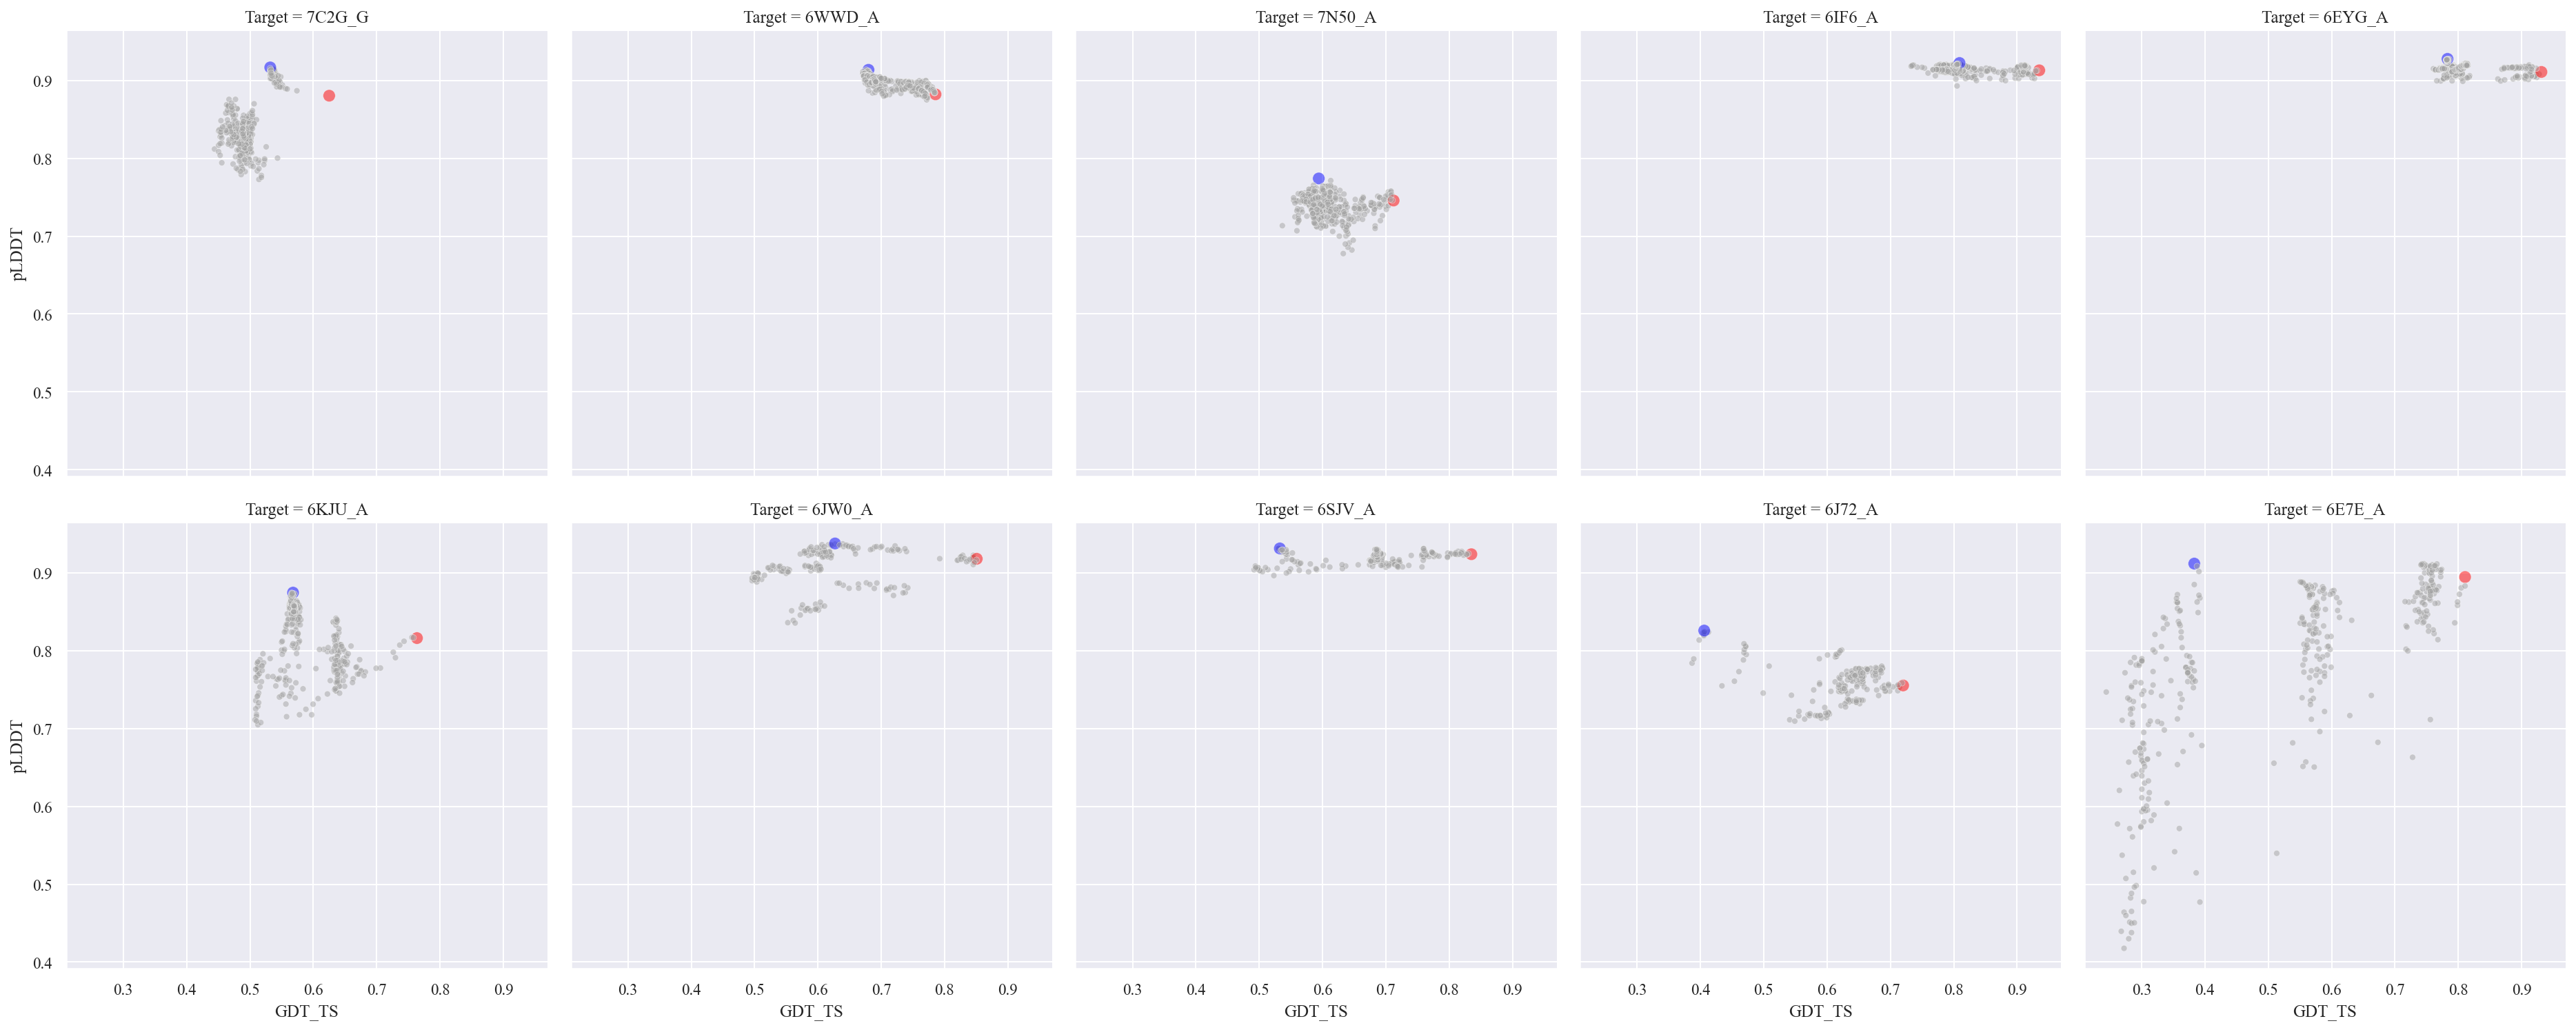

In [4]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets)
def add_legend(group, label, method, legend='Loss'):
    best_idx = group[label].idxmax()
    selected_idx = group[method].idxmax()
    best_row = group.loc[best_idx]
    selected_row = group.loc[selected_idx]
    columns = ['Target', 'Model', label, method, 'legend']
    best_row['legend'] = 'best'
    selected_row['legend'] = 'selected'
    display(pd.concat([best_row[columns].to_frame().T, selected_row[columns].to_frame().T]).reset_index(drop=True))
    group[legend] = 'others'
    group[legend][best_idx] = 'best'
    group[legend][selected_idx] = 'selected'
    size = 5
    group['size'] = size
    size_focus = size * 5
    group['size'][best_idx] = size_focus
    group['size'][selected_idx] = size_focus
    return group

label = 'GDT_TS'
method = 'pLDDT'
data = data.groupby('Target').apply(add_legend, label=label, method=method)
display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, col_order=sample_targets,
            palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
g.legend.remove()

Target                        Model GDT_TS pLDDT    legend
0  6E7E_A  model_1_seed_0_rec_10_ens_8  0.811 0.895      best
1  6E7E_A  model_3_seed_1_rec_10_ens_8  0.383 0.912  selected

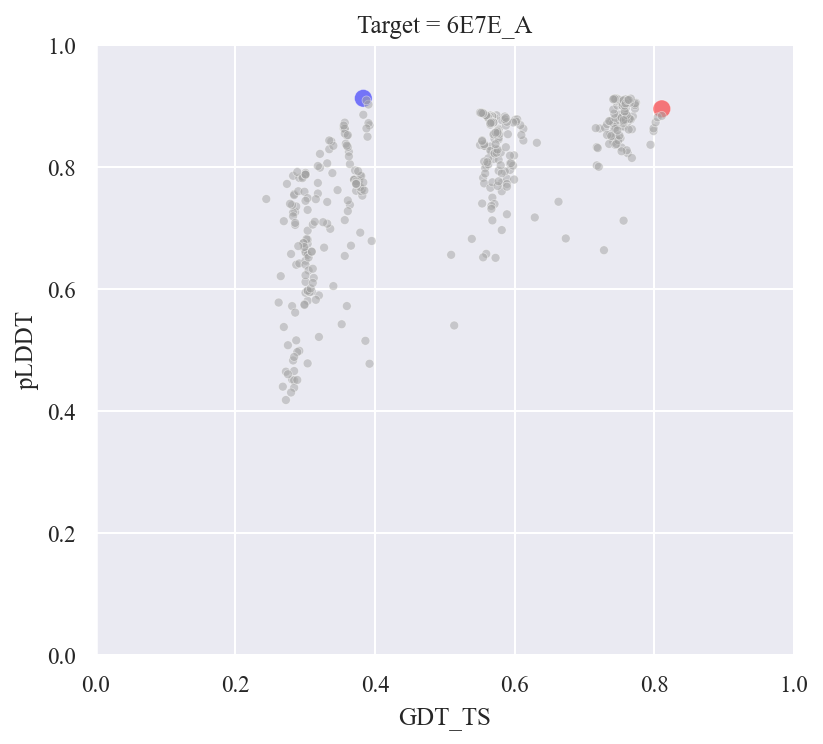

In [5]:
# Target which is the worst loss
sample_target = sample_targets[-1]
data = df.groupby('Target').filter(lambda x: x.name in sample_target)
label = 'GDT_TS'
method = 'pLDDT'
data = data.groupby('Target').apply(add_legend, label=label, method=method)
# display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
g.legend.remove()

Target                           Model GDT_TS pLDDT    legend
0  6J72_A      model_5_seed_0_rec_7_ens_1   0.72 0.755      best
1  6J72_A  model_3_ptm_seed_0_rec_9_ens_1  0.406 0.826  selected

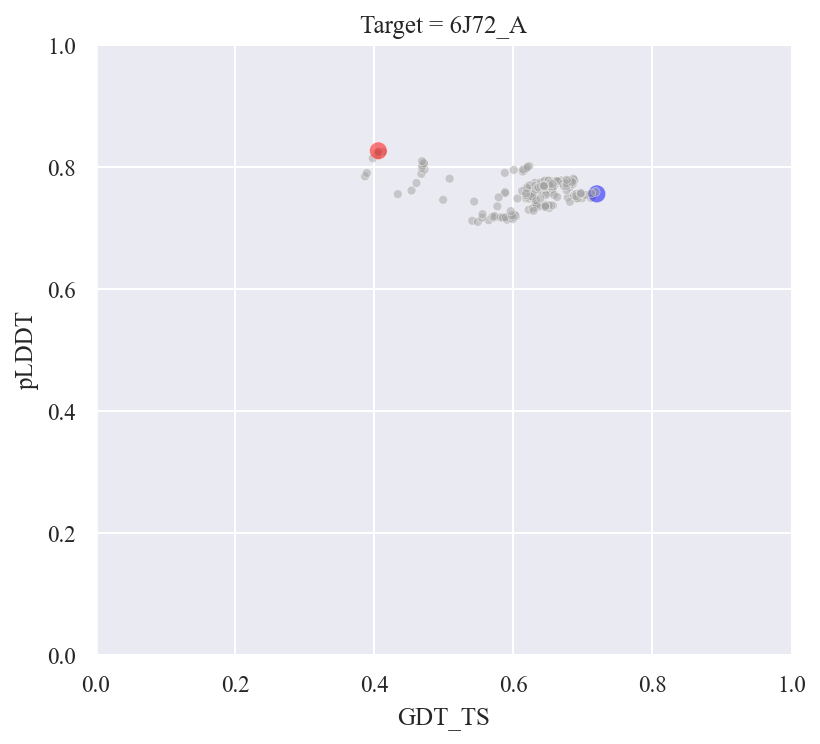

In [6]:
# Target which is the 2nd worst loss
sample_target = sample_targets[-2]
data = df.groupby('Target').filter(lambda x: x.name in sample_target)
label = 'GDT_TS'
method = 'pLDDT'
data = data.groupby('Target').apply(add_legend, label=label, method=method)
# display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
g.legend.remove()

### Pearson

In [7]:
# Pearson
method = 'pLDDT'
label = 'GDT_TS'
metric = 'Pearson'
label_metric = f'{label} {metric}'
low_corr_df = result_each_target.query('Method == @method')[['Target', label_metric]].sort_values(label_metric)
low_corr_df

Target  GDT_TS Pearson
758  6WWD_A          -0.718
648  6S36_A          -0.607
528  6PFL_A          -0.603
698  6SXJ_A          -0.534
458  6LBU_B          -0.468
..      ...             ...
468  6LK7_A           0.852
768  6WWX_A           0.902
148  6DGK_A           0.924
748  6W9S_A           0.958
298  6I3H_A           0.987

[99 rows x 2 columns]

In [8]:
target_num = 10
display(low_corr_df.head(target_num).reset_index(drop=True))
sample_targets = low_corr_df.head(target_num)['Target'].to_list()
sample_targets

Target  GDT_TS Pearson
0  6WWD_A          -0.718
1  6S36_A          -0.607
2  6PFL_A          -0.603
3  6SXJ_A          -0.534
4  6LBU_B          -0.468
5  6RNQ_A          -0.451
6  6AA8_C          -0.340
7  6J72_A          -0.317
8  5XX0_A          -0.307
9  7COH_T          -0.299

['6WWD_A',
 '6S36_A',
 '6PFL_A',
 '6SXJ_A',
 '6LBU_B',
 '6RNQ_A',
 '6AA8_C',
 '6J72_A',
 '5XX0_A',
 '7COH_T']

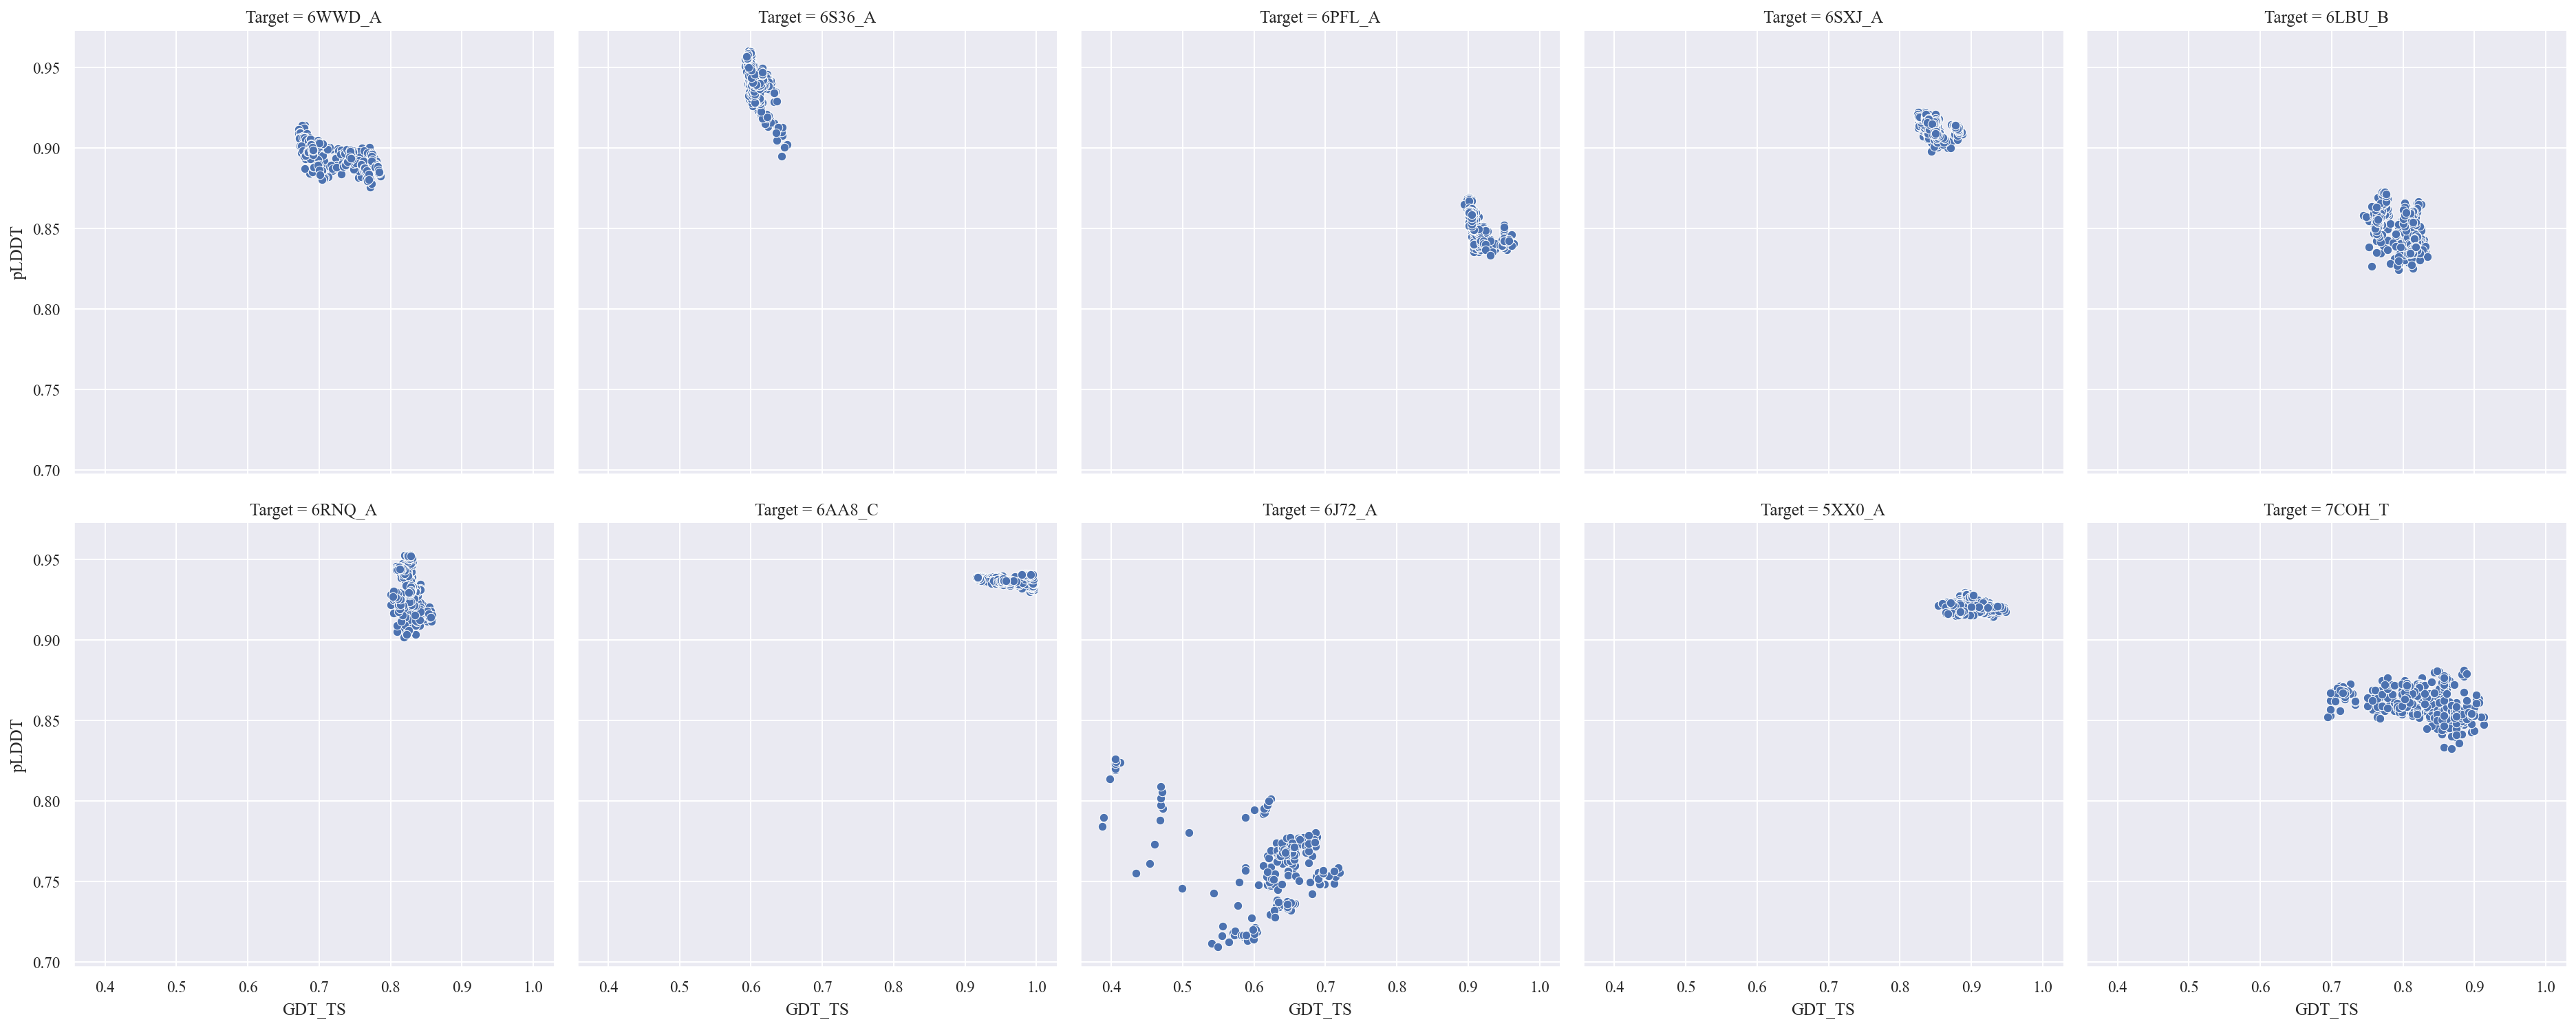

In [9]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets)
method = 'pLDDT'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets)

## Target with low relationship between GDT_TS and pTMscore

### Target with Low GDT_TS loss

In [10]:
method = 'pTMscore'
label = 'GDT_TS'
metric = 'Loss'
label_metric = f'{label} {metric}'
low_gdtts_loss_df_ptm = result_each_target_ptm.query('Method == @method')[['Target', label_metric]].sort_values(label_metric)
low_gdtts_loss_df_ptm

Target  GDT_TS Loss
189   6EYG_A        0.000
499   6QDI_A        0.000
679   6WWX_A        0.000
139   6D2Y_A        0.000
689  6XHV_1P        0.000
..       ...          ...
669   6WWD_A        8.800
639   6U60_A        9.110
849   7N50_A       11.820
289   6IF6_A       19.090
379   6KJU_A       19.570

[87 rows x 2 columns]

In [11]:
target_num = 2
display(low_gdtts_loss_df_ptm.tail(target_num).reset_index(drop=True))
sample_targets = low_gdtts_loss_df_ptm[-target_num:]['Target'].to_list()

Target  GDT_TS Loss
0  6IF6_A       19.090
1  6KJU_A       19.570

Target                            Model GDT_TS pTMscore    legend
0  6KJU_A  model_3_ptm_seed_1_rec_10_ens_1  0.764    0.765      best
1  6KJU_A  model_4_ptm_seed_0_rec_10_ens_1  0.568     0.78  selected

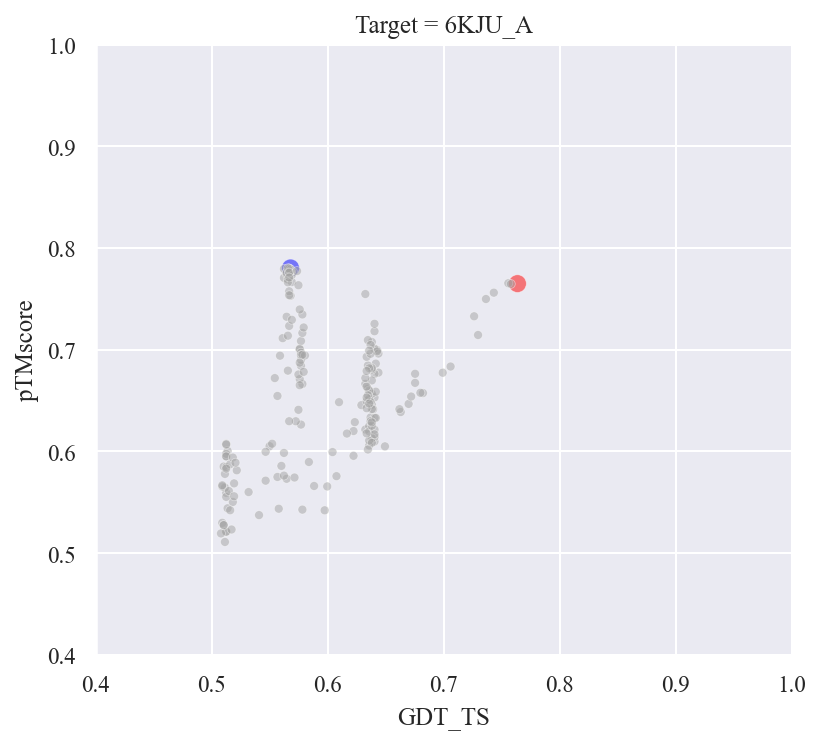

In [12]:
# Target which is the worst loss
label = 'GDT_TS'
method = 'pTMscore'
sample_target = sample_targets[-1]
data = df[~df[method].isna()].groupby('Target').filter(lambda x: x.name in sample_target)
data = data.groupby('Target').apply(add_legend, label=label, method=method)
# display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
plt.xlim(0.4, 1)
plt.ylim(0.4, 1)
g.legend.remove()

Target                           Model GDT_TS pTMscore    legend
0  6IF6_A  model_2_ptm_seed_1_rec_1_ens_8  0.927    0.842      best
1  6IF6_A  model_5_ptm_seed_1_rec_7_ens_1  0.737    0.864  selected

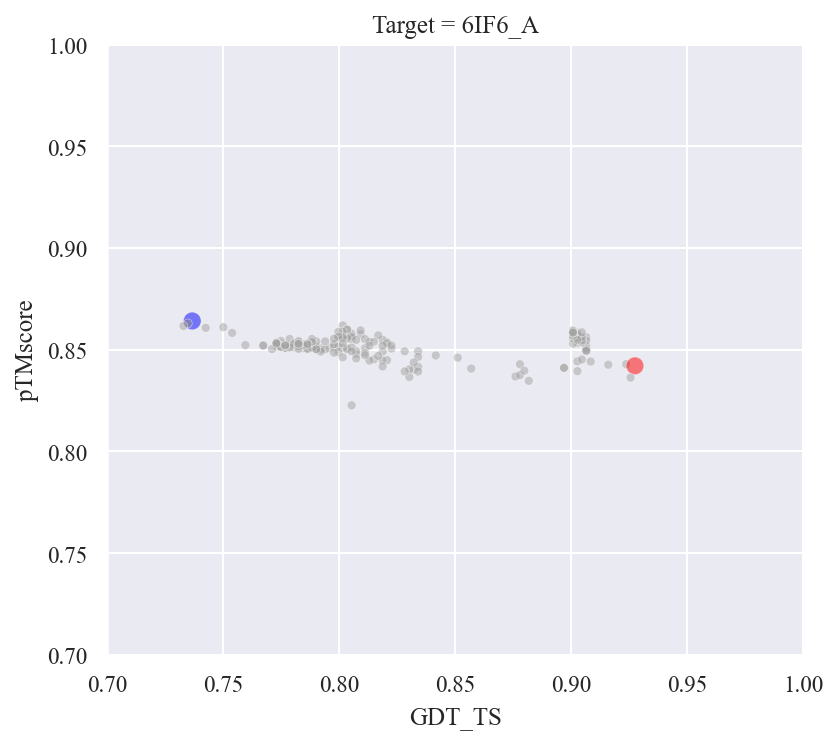

In [13]:
# Target which is the worst loss
label = 'GDT_TS'
method = 'pTMscore'
sample_target = sample_targets[-2]
data = df[~df[method].isna()].groupby('Target').filter(lambda x: x.name in sample_target)
data = data.groupby('Target').apply(add_legend, label=label, method=method)
# display(data)
x, y = label, method
g = sns.relplot(data=data, x=x, y=y, kind='scatter', hue='Loss', size='size',
            col='Target', col_wrap=5, palette=['#a3a3a3', 'red', 'blue'], alpha=0.5)
plt.xlim(0.7, 1)
plt.ylim(0.7, 1)
g.legend.remove()

### Targets with low correlation between pTMscore and GDT_TS

In [14]:
# Pearson
method = 'pTMscore'
label = 'GDT_TS'
metric = 'Pearson'
label_metric = f'{label} {metric}'
low_corr_df_ptm = result_each_target_ptm.query('Method == @method')[['Target', label_metric]].sort_values(label_metric)
low_corr_df_ptm

Target  GDT_TS Pearson
119  6AA8_C          -0.887
669  6WWD_A          -0.856
569  6S36_A          -0.820
29   5XLL_A          -0.692
49   5XX0_A          -0.624
..      ...             ...
339  6JFK_A           0.907
659  6W9S_A           0.930
149  6DGK_A           0.945
619  6TGV_A           0.976
269  6I3H_A           0.982

[87 rows x 2 columns]

In [15]:
target_num = 10
display(low_corr_df_ptm.head(target_num).reset_index(drop=True))
sample_targets = low_corr_df_ptm.head(target_num)['Target'].to_list()
sample_targets

Target  GDT_TS Pearson
0  6AA8_C          -0.887
1  6WWD_A          -0.856
2  6S36_A          -0.820
3  5XLL_A          -0.692
4  5XX0_A          -0.624
5  5OJL_A          -0.561
6  6LBU_B          -0.560
7  6QP4_A          -0.463
8  6D1V_A          -0.438
9  6U60_A          -0.384

['6AA8_C',
 '6WWD_A',
 '6S36_A',
 '5XLL_A',
 '5XX0_A',
 '5OJL_A',
 '6LBU_B',
 '6QP4_A',
 '6D1V_A',
 '6U60_A']

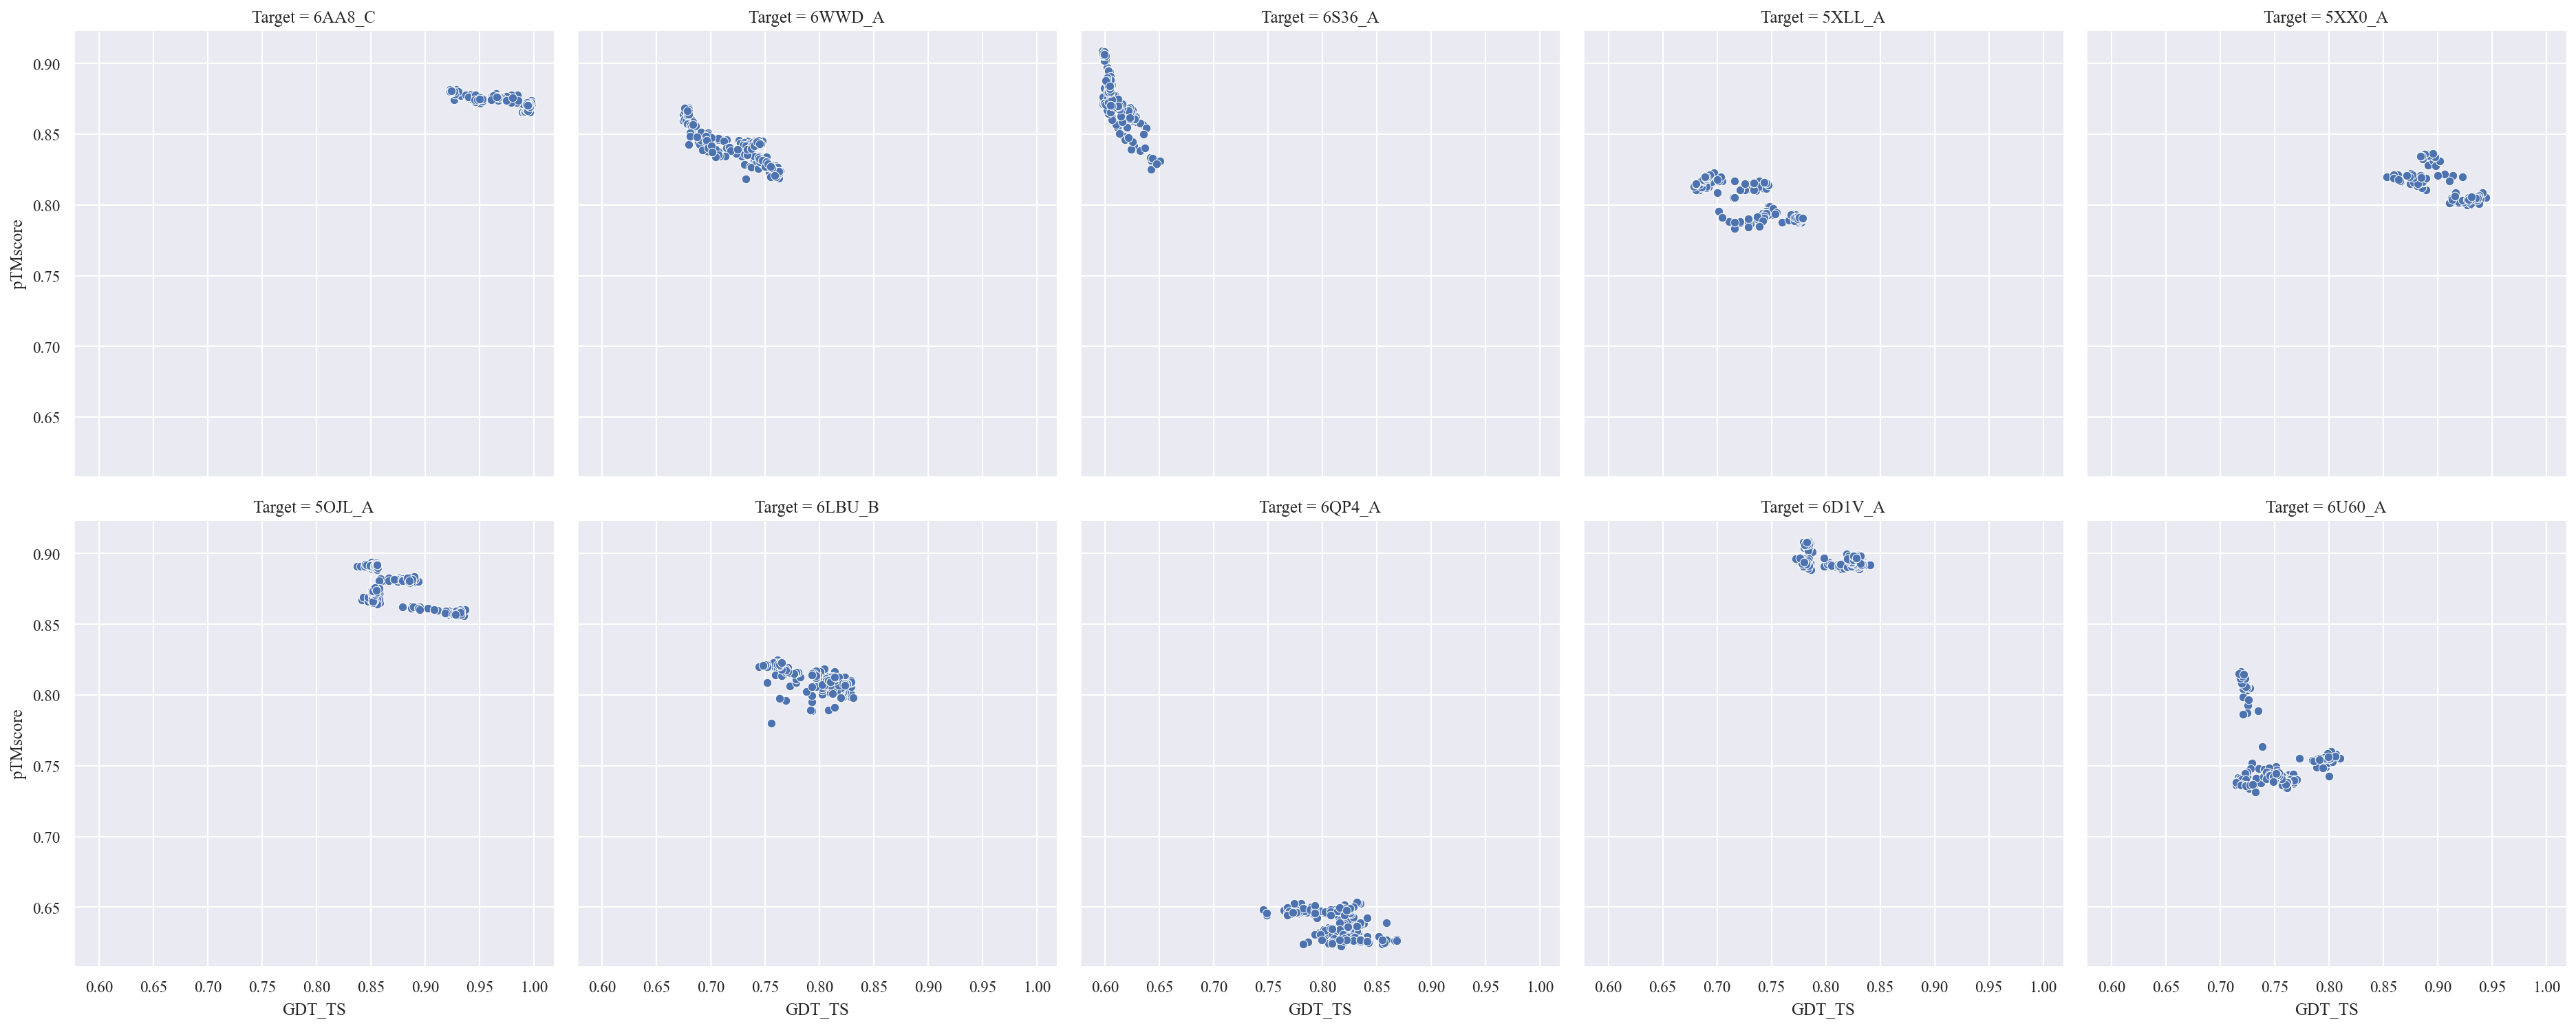

In [16]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets)
method = 'pTMscore'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets)

## Targets with low GDT_TS

In [17]:
label = 'GDT_TS'
target_num = 20
gdtts_max_df = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmax()]).sort_values(label)
display(gdtts_max_df.head(target_num))
sample_targets = gdtts_max_df.head(target_num).index.to_list()

Model  TMscore  GDT_TS  GDT_HA  \
Target                                                              
6IA5_D        model_2_seed_0_rec_9_ens_8    0.428   0.411   0.385   
7FE5_A        model_2_seed_1_rec_1_ens_1    0.618   0.493   0.309   
7CF7_A        model_3_seed_0_rec_2_ens_1    0.543   0.519   0.421   
7CHU_A    model_5_ptm_seed_0_rec_5_ens_1    0.748   0.596   0.484   
6XHV_1P       model_4_seed_1_rec_6_ens_8    0.543   0.599   0.460   
7C2G_G        model_5_seed_1_rec_1_ens_8    0.654   0.625   0.497   
6S36_A    model_4_ptm_seed_0_rec_1_ens_8    0.734   0.651   0.489   
6G0Y_F        model_1_seed_0_rec_1_ens_1    0.689   0.658   0.586   
6IST_C        model_3_seed_0_rec_2_ens_8    0.661   0.660   0.642   
6AGW_A       model_2_seed_0_rec_10_ens_1    0.699   0.690   0.627   
5Y3T_A       model_3_seed_0_rec_10_ens_8    0.649   0.691   0.570   
6CC2_A        model_5_seed_1_rec_1_ens_1    0.871   0.707   0.516   
7N50_A    model_1_ptm_seed_1_rec_6_ens_8    0.828   0.712   0.503   
6J72_A        model_5_seed_0_rec_7_ens_1    0.871   0.720   0.538   
6YS4_A        model_5_seed_1_rec_6_ens_1    0.696   0.730   0.571   
7D6R_A        model_5_seed_1_rec_2_ens_1    0.807   0.748   0.671   
6JIM_A        model_5_seed_1_rec_1_ens_1    0.890   0.749   0.575   
6H1W_A    model_3_ptm_seed_0_rec_1_ens_1    0.792   0.763   0.583   
6O1W_A        model_3_seed_0_rec_1_ens_1    0.800   0.763   0.636   
6KJU_A   model_3_ptm_seed_1_rec_10_ens_1    0.839   0.764   0.626   

         Global_LDDT  Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...  \
Target                                                                    ...   
6IA5_D         0.867      0.814  0.818       NaN      0.468      model_2  ...   
7FE5_A         0.464      0.461  0.533       NaN     38.508      model_2  ...   
7CF7_A         0.697      0.723  0.916       NaN      0.673      model_3  ...   
7CHU_A         0.710      0.678  0.713     0.685      1.762  model_5_ptm  ...   
6XHV_1P        0.805      0.768  0.817       NaN      0.860      model_4  ...   
7C2G_G         0.841      0.827  0.881       NaN     37.547      model_5  ...   
6S36_A         0.813      0.814  0.902     0.831     23.940  model_4_ptm  ...   
6G0Y_F         0.708      0.684  0.710       NaN     31.630      model_1  ...   
6IST_C         0.837      0.845  0.822       NaN      6.163      model_3  ...   
6AGW_A         0.876      0.854  0.926       NaN      0.037      model_2  ...   
5Y3T_A         0.849      0.836  0.859       NaN      0.056      model_3  ...   
6CC2_A           NaN        NaN  0.844       NaN     33.834      model_5  ...   
7N50_A           NaN        NaN  0.746     0.755      0.293  model_1_ptm  ...   
6J72_A         0.735      0.732  0.755       NaN      0.285      model_5  ...   
6YS4_A           NaN        NaN  0.966       NaN      0.032      model_5  ...   
7D6R_A         0.766      0.738  0.736       NaN      7.881      model_5  ...   
6JIM_A         0.876      0.874  0.930       NaN     33.243      model_5  ...   
6H1W_A           NaN        NaN  0.940     0.751     35.247  model_3_ptm  ...   
6O1W_A           NaN        NaN  0.911       NaN     33.205      model_3  ...   
6KJU_A         0.804      0.789  0.816     0.765      0.499  model_3_ptm  ...   

              SOAP  DeepAccNet  DeepAccNet-Bert P3CMQA  ProQ2D  ProQRosCenD  \
Target                                                                        
6IA5_D  238858.375       0.736            0.914  0.437   0.242        0.349   
7FE5_A  104560.141       0.467            0.526  0.204   0.208        0.537   
7CF7_A   94257.609       0.914            0.878  0.891   0.758        0.751   
7CHU_A  367121.250       0.675            0.709  0.383   0.179        0.117   
6XHV_1P  50644.473       0.538            0.537  0.622   0.301        0.341   
7C2G_G  142900.141       0.957            0.878  0.865   0.624        0.641   
6S36_A  122845.938       0.923            0.848  0.994   0.765        0.881   
6G0Y_F   42606.000    

In [18]:
df.columns

Index(['Model', 'TMscore', 'GDT_TS', 'GDT_HA', 'Global_LDDT', 'Mean_LDDT',
       'pLDDT', 'pTMscore', 'Tolerance', 'ModelName', 'Seed', 'Recycle',
       'Ensemble', 'Target', 'Num_diff', 'Num_missing', 'Length', 'id',
       'resolution', 'releasedate', 'header', 'sequence', 'length',
       'num_entry_in_cluster', 'num_entry_in_cluster_AF2_notInclude',
       'is_similar_AF2', 'DOPE', 'SOAP', 'DeepAccNet', 'DeepAccNet-Bert',
       'P3CMQA', 'ProQ2D', 'ProQRosCenD', 'ProQRosFAD', 'ProQ3D', 'SBROD',
       'VoroCNN'],
      dtype='object')

In [19]:
gdtts_max_df.columns

Index(['Model', 'TMscore', 'GDT_TS', 'GDT_HA', 'Global_LDDT', 'Mean_LDDT',
       'pLDDT', 'pTMscore', 'Tolerance', 'ModelName', 'Seed', 'Recycle',
       'Ensemble', 'Target', 'Num_diff', 'Num_missing', 'Length', 'id',
       'resolution', 'releasedate', 'header', 'sequence', 'length',
       'num_entry_in_cluster', 'num_entry_in_cluster_AF2_notInclude',
       'is_similar_AF2', 'DOPE', 'SOAP', 'DeepAccNet', 'DeepAccNet-Bert',
       'P3CMQA', 'ProQ2D', 'ProQRosCenD', 'ProQRosFAD', 'ProQ3D', 'SBROD',
       'VoroCNN'],
      dtype='object')

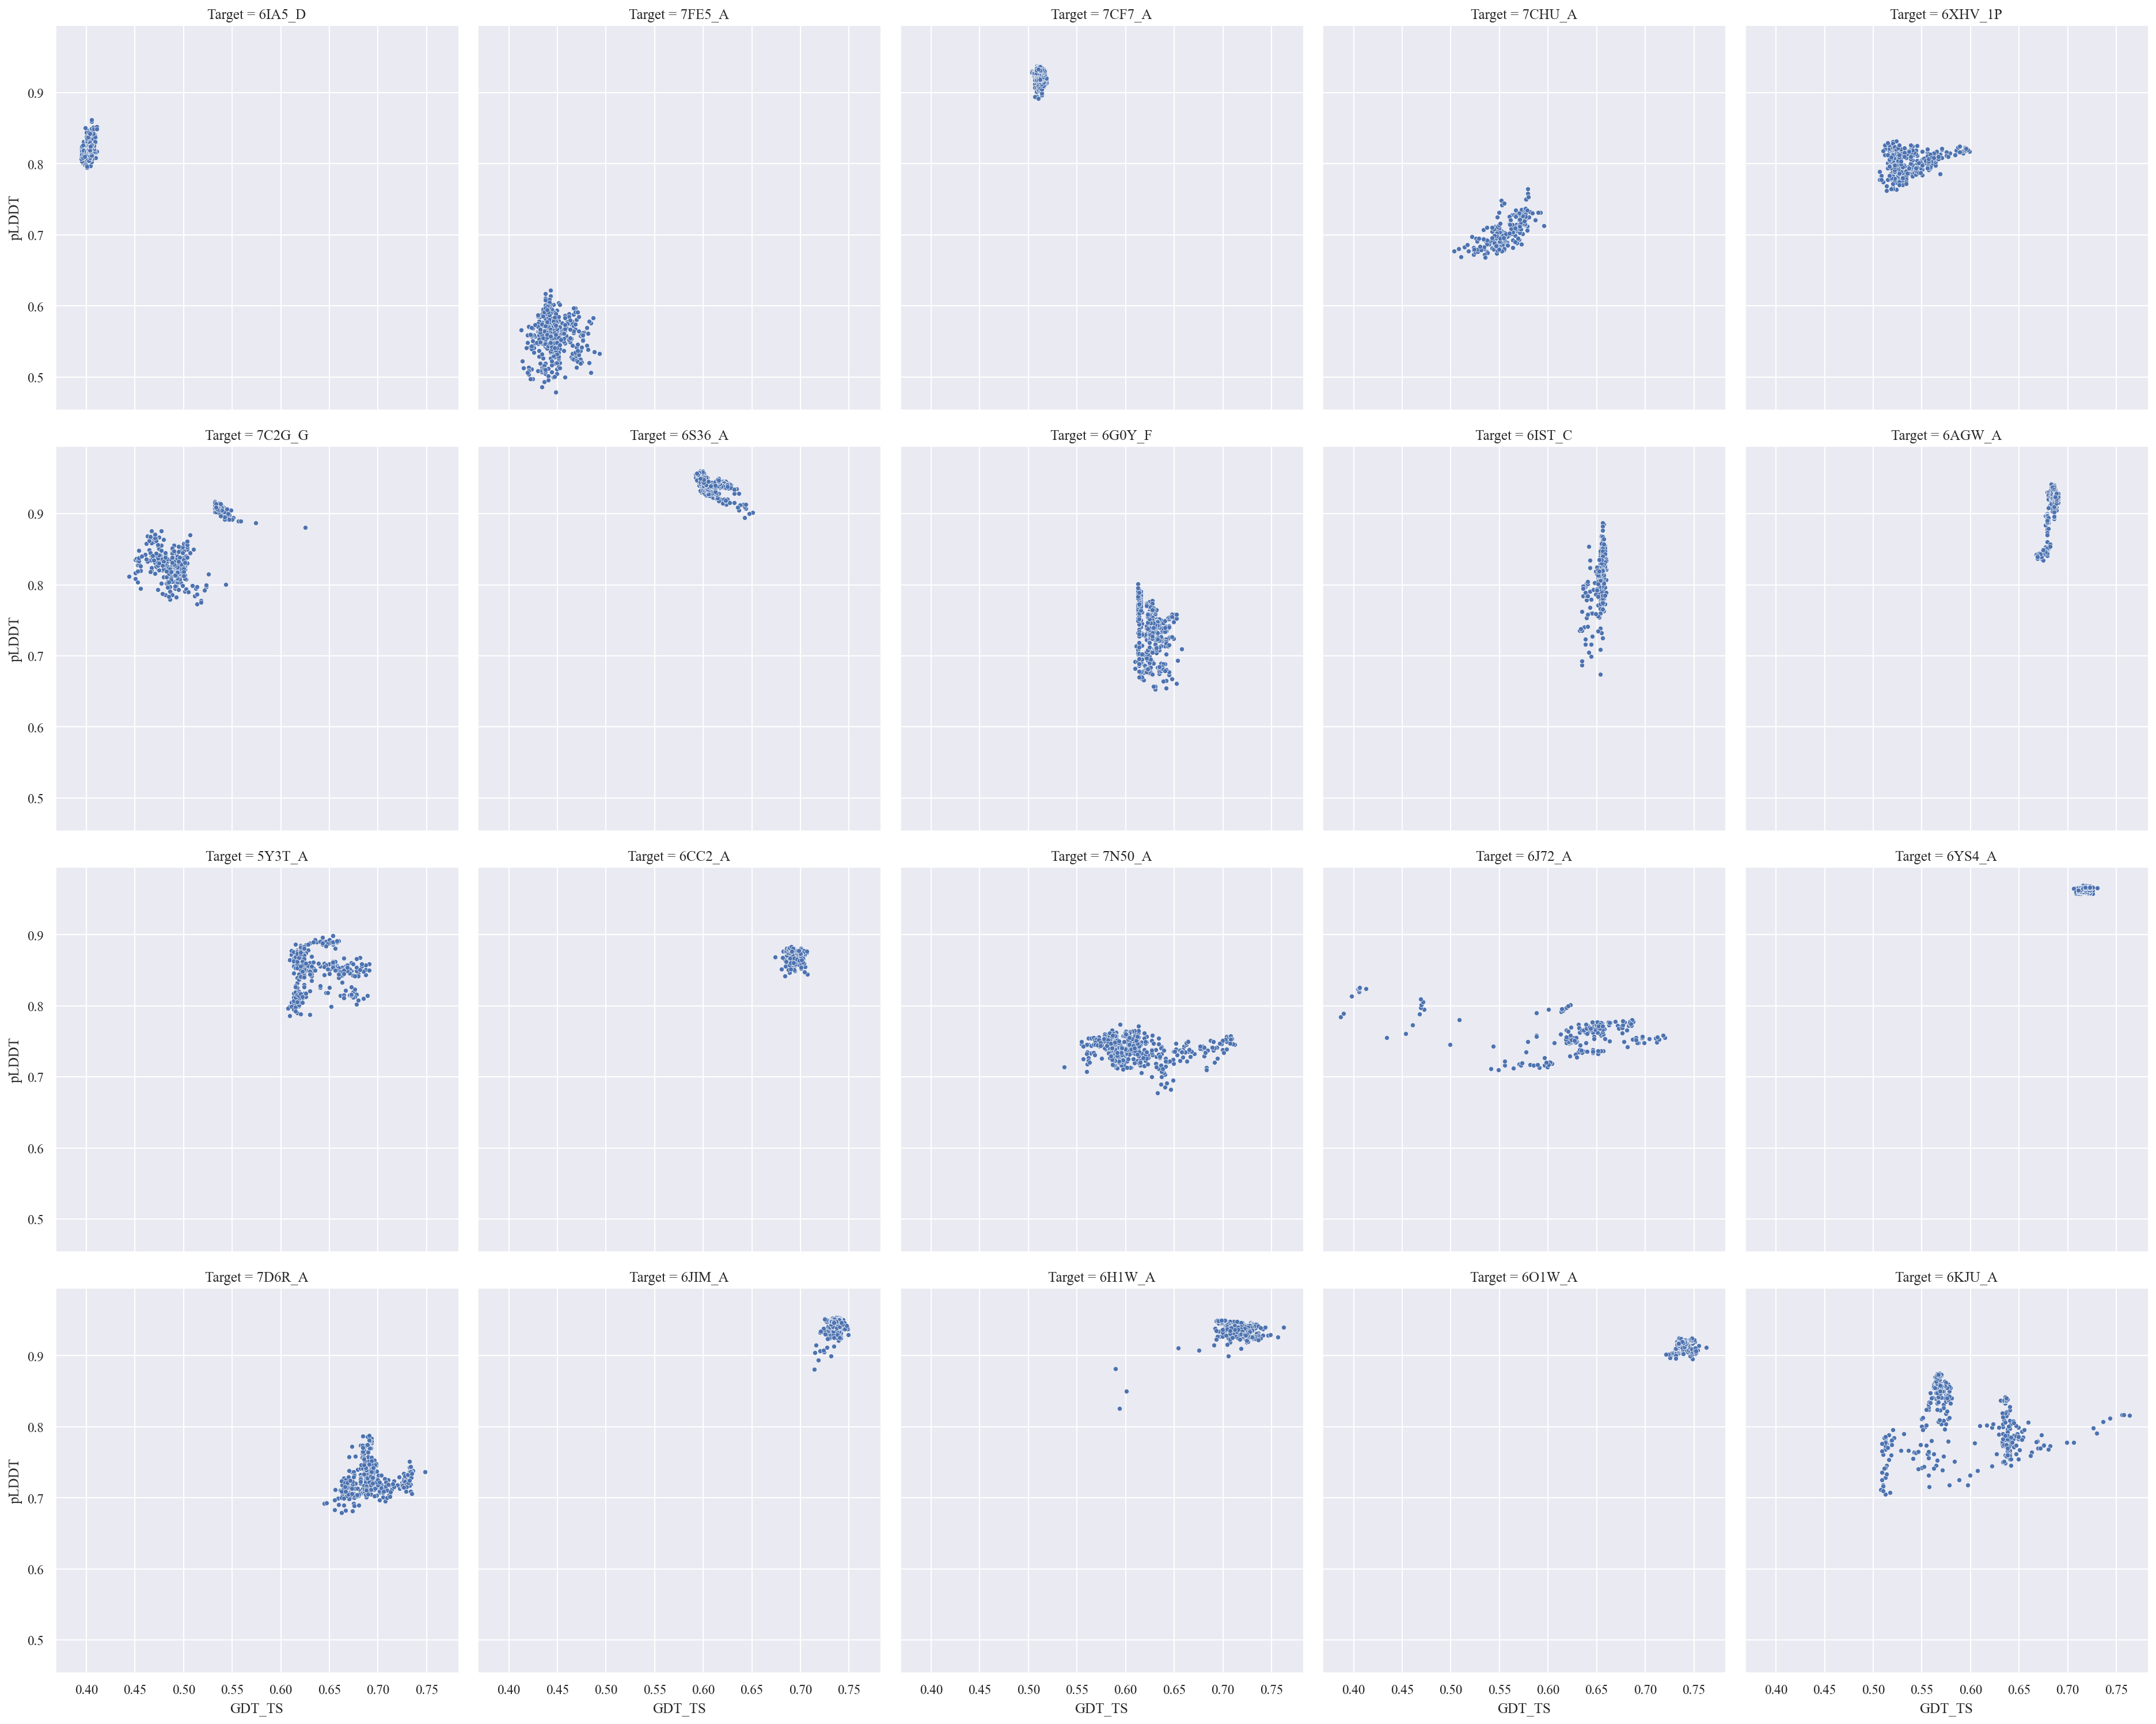

In [20]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets)
method = 'pLDDT'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets, s=15)

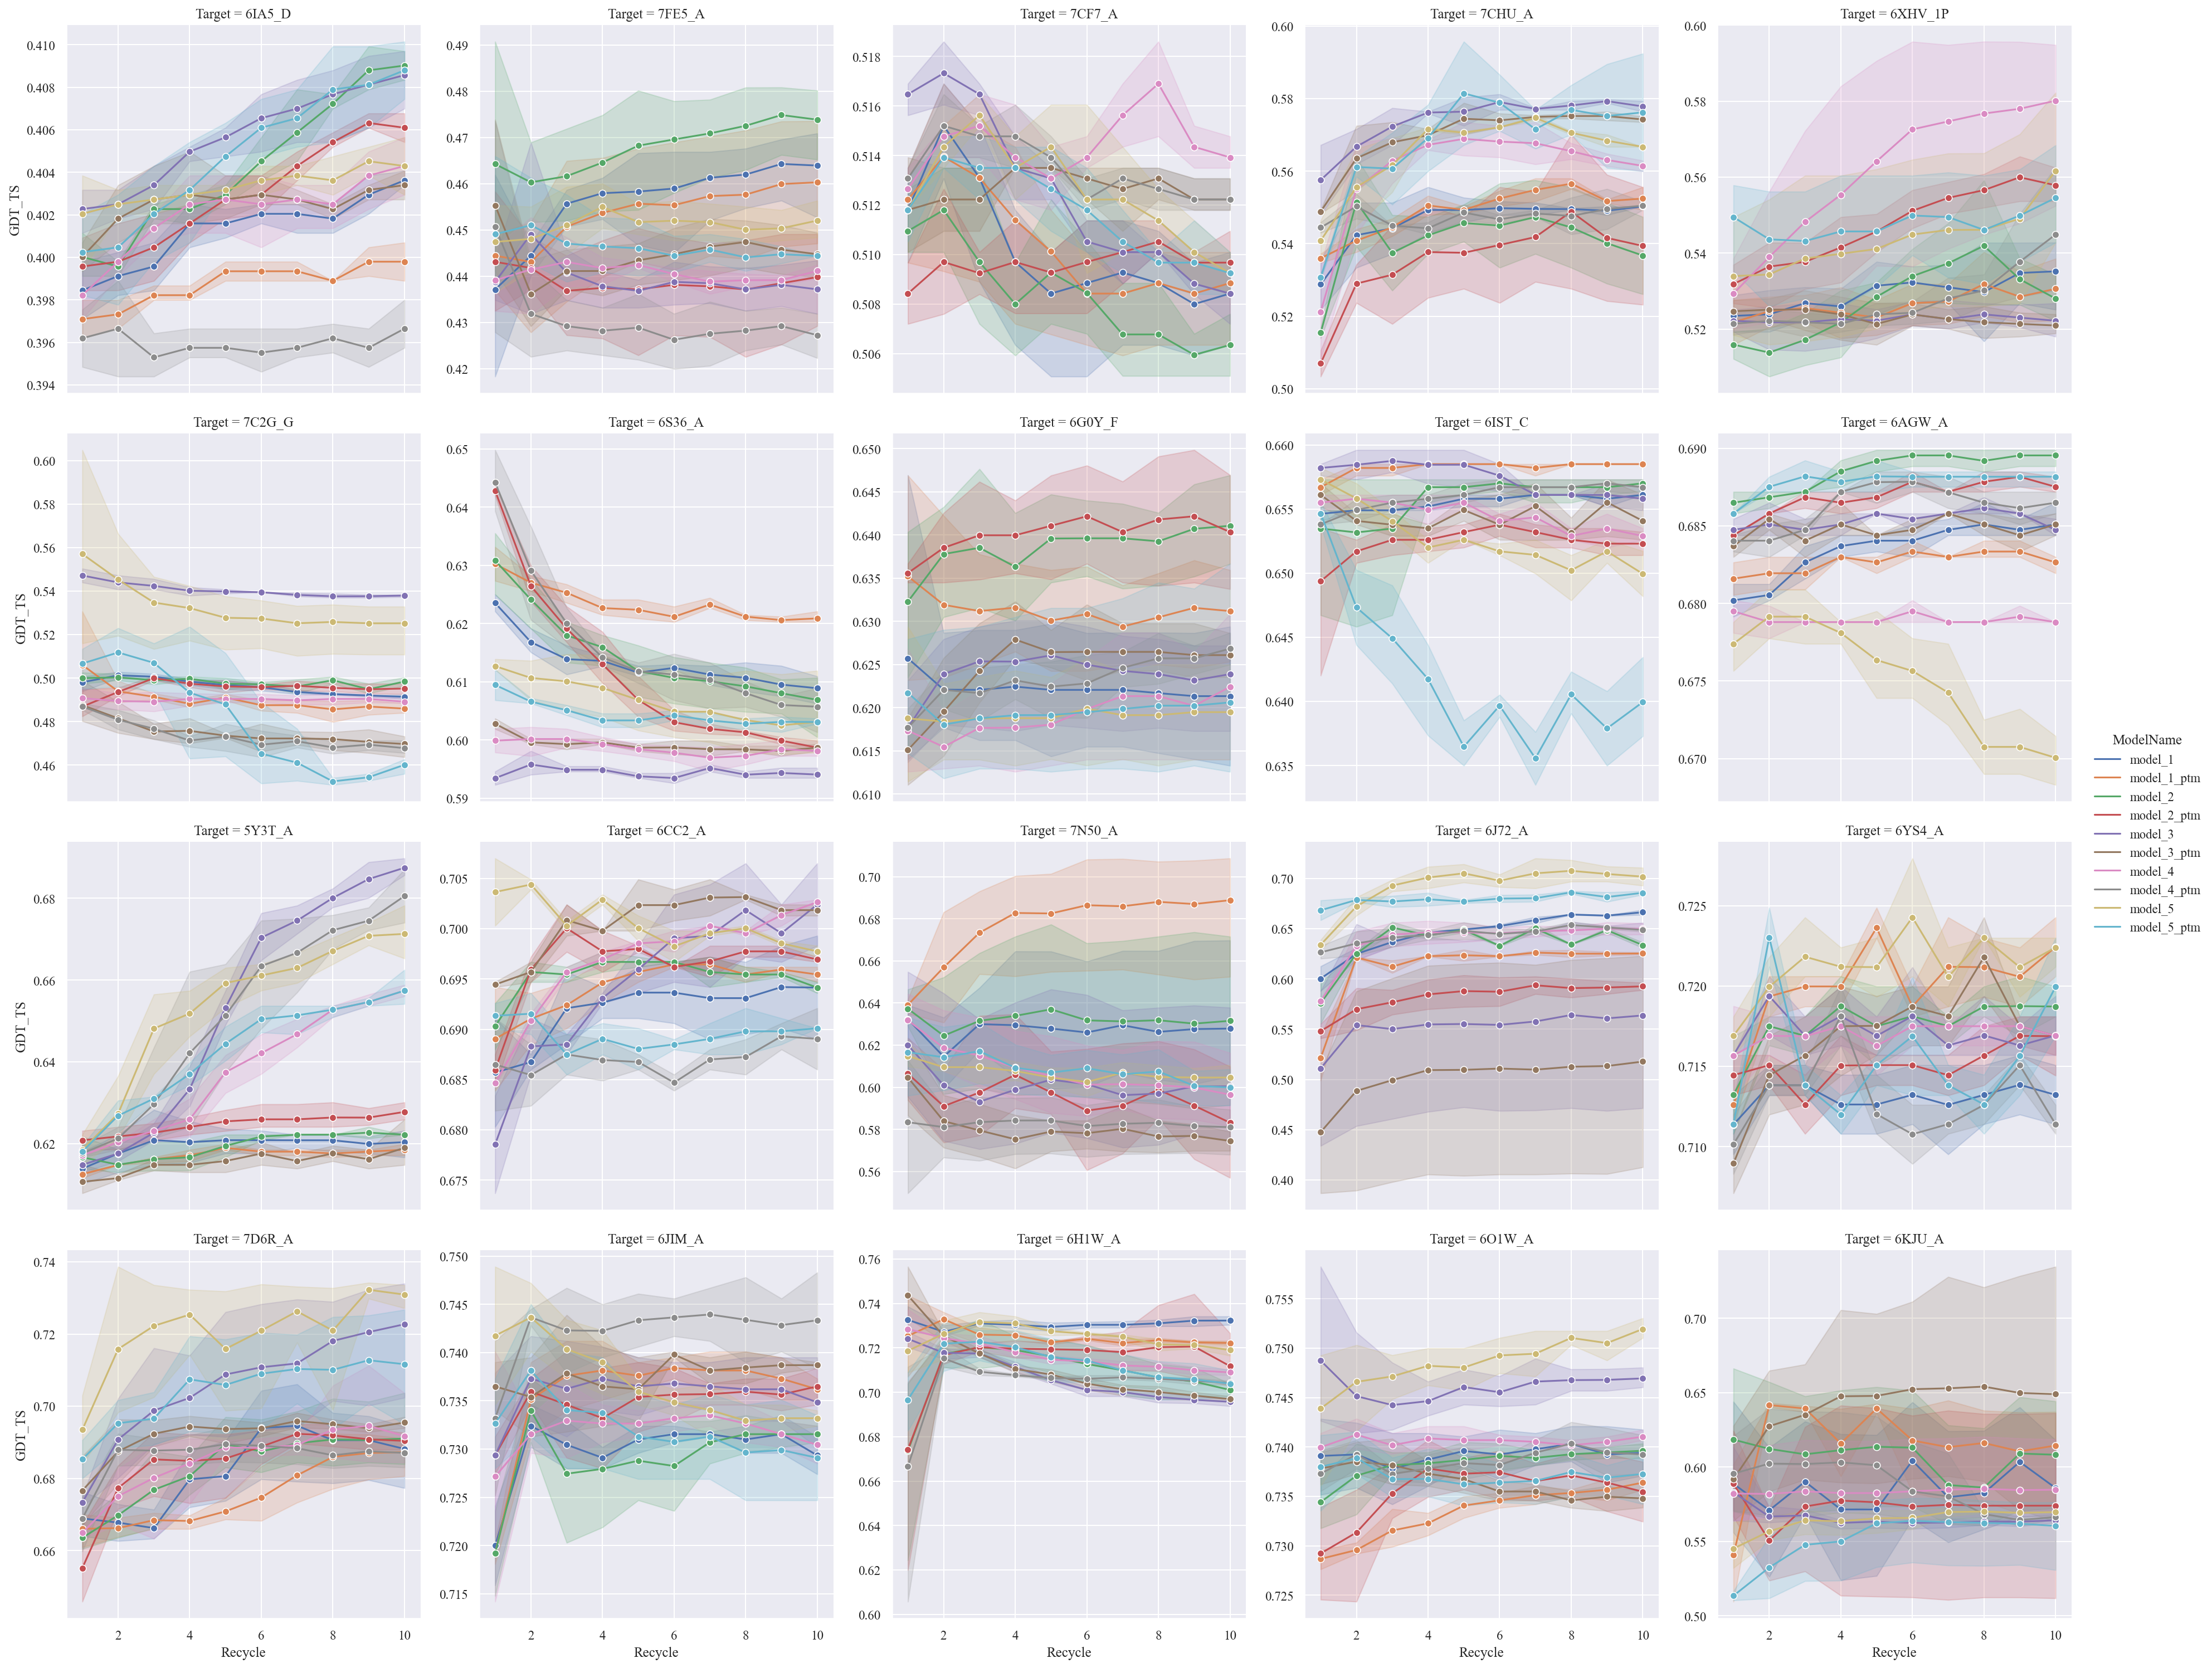

In [21]:
label = 'GDT_TS'
# For targets whose value difference between max and min is larger than threshold
data = df.query('Target in @sample_targets')
sns.relplot(data=data.sort_values(['Target', 'ModelName']), x='Recycle', y=label,
            hue='ModelName', kind='line', markers=True, dashes=True, marker='o',
            col='Target', col_wrap=5, col_order=sample_targets, facet_kws={'sharey': False, 'sharex': True})

## Targets with large differences in accuracy between prediction models

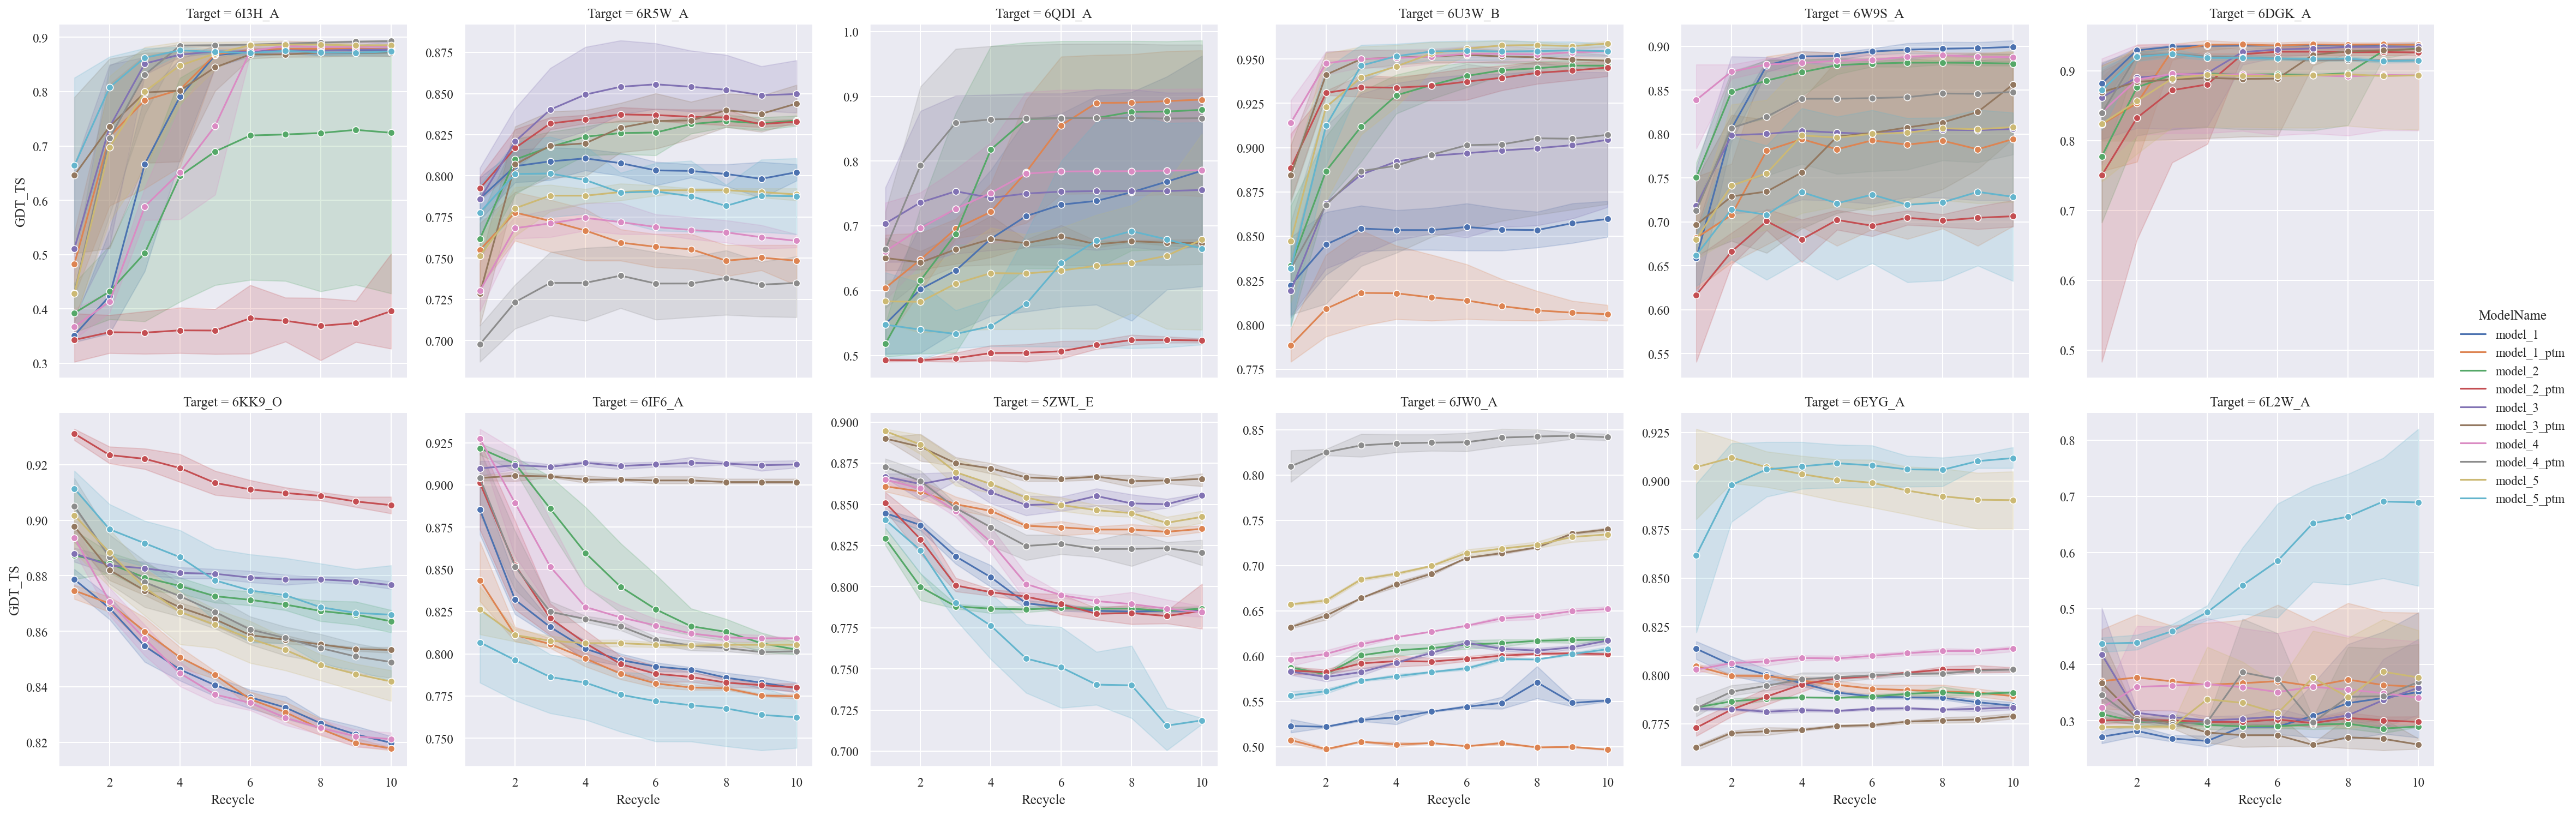

In [22]:
# Sample targets
label = 'GDT_TS'
sample_targets = ['6I3H_A', '6R5W_A', '6QDI_A', '6U3W_B', '6W9S_A', '6DGK_A', '6KK9_O', '6IF6_A', '5ZWL_E', '6JW0_A', '6EYG_A', '6L2W_A']
data = df.query('Target in @sample_targets')
sns.relplot(data=data.sort_values(['Target', 'ModelName']), x='Recycle', y='GDT_TS',
            hue='ModelName', kind='line', markers=True, dashes=True, marker='o', col_order=sample_targets,
            col='Target', col_wrap=6, facet_kws={'sharey': False, 'sharex': True})

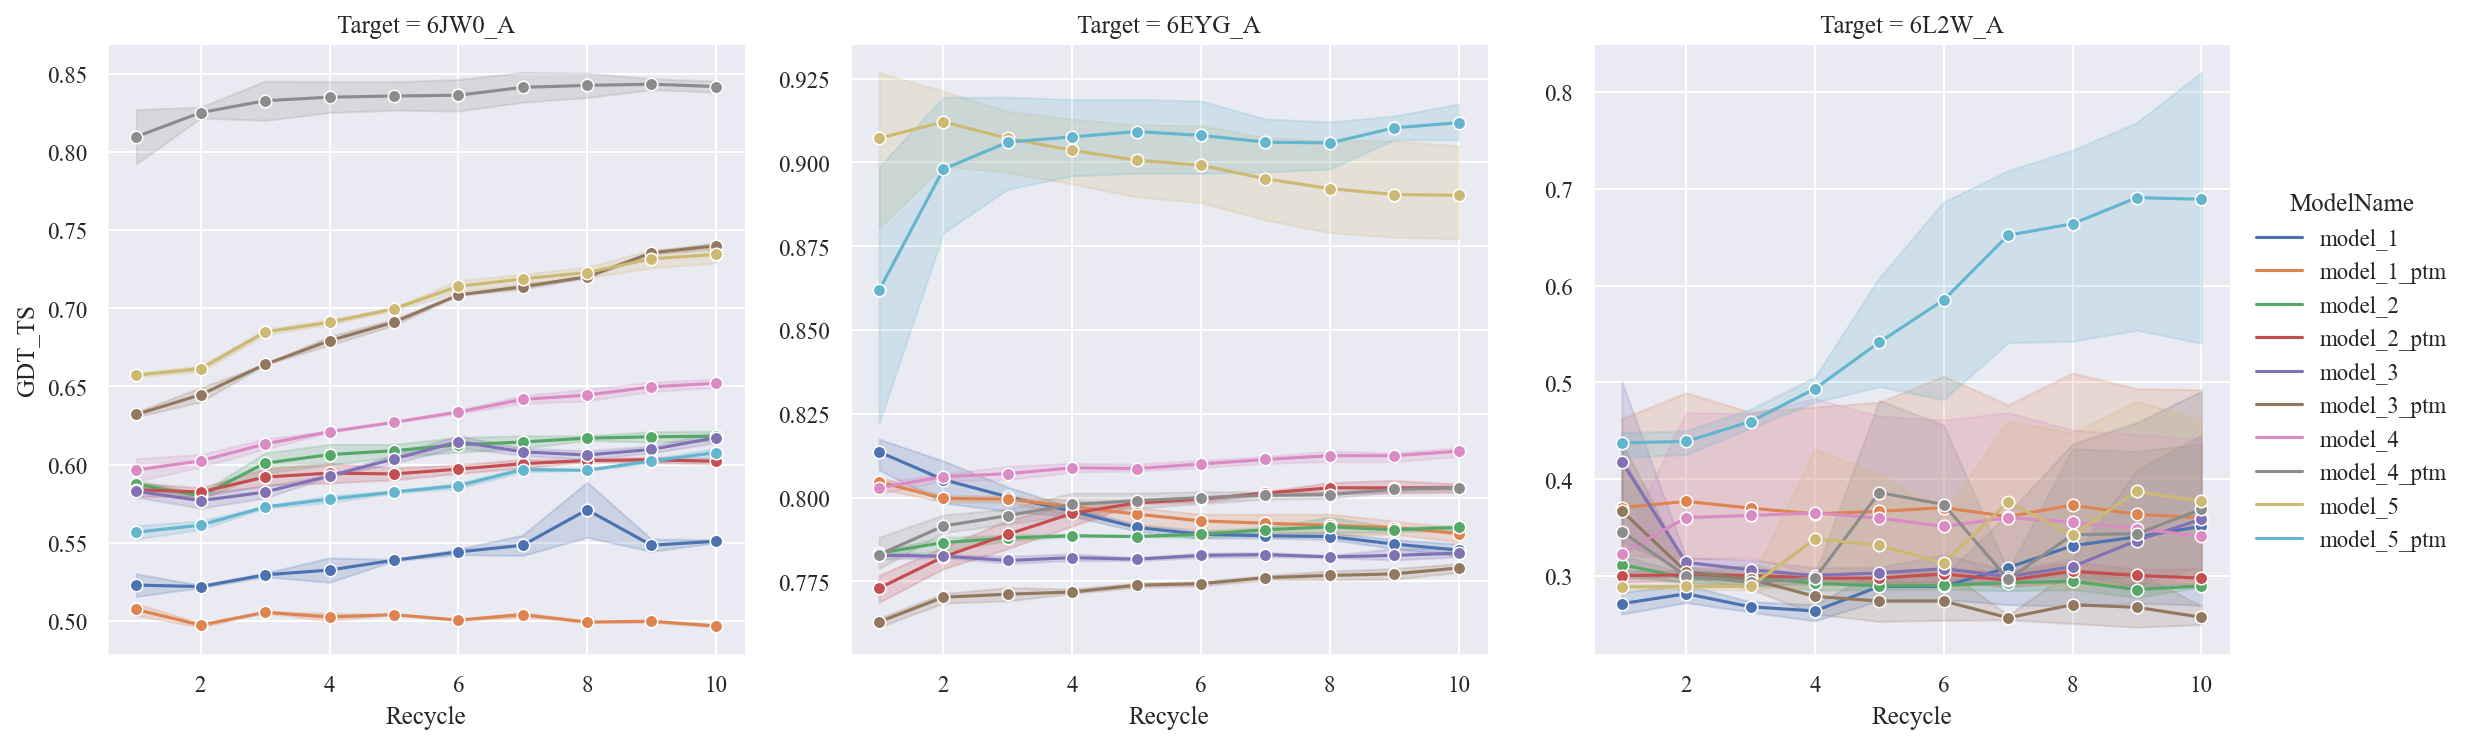

In [23]:
# Cases where there is a large difference in accuracy between models
label = 'GDT_TS'
sample_targets = ['6JW0_A', '6EYG_A', '6L2W_A']
data = df.query('Target in @sample_targets')
sns.relplot(data=data.sort_values(['Target', 'ModelName']), x='Recycle', y='GDT_TS',
            hue='ModelName', kind='line', markers=True, dashes=True, marker='o', col_order=sample_targets,
            col='Target', col_wrap=3, facet_kws={'sharey': False, 'sharex': True})